In [1]:
from fastai.tabular.all import *

In [ ]:
data_path = 'C:/Users/light/Documents/Fastbook/Personal-Machine-Learning-Data/'

In [2]:
df = pd.read_csv(data_path + 'processed-cleveland-heart-disease.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [6]:
df['target'].where(df['target'] <= 1, 1, inplace=True)

In [7]:
df_cat = ['age', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in df_cat:
    df[col] = df[col].astype(int)

In [8]:
dep_var = 'target'

In [9]:
cont,cat = cont_cat_split(df, dep_var=dep_var)

In [10]:
splits = RandomSplitter(valid_pct=0.2)(range_of(df))

In [11]:
to = TabularPandas(df, procs=[Categorify, Normalize],
                  cont_names = cont,
                  cat_names = cat,
                  y_names = dep_var,
                  y_block = CategoryBlock, 
                  splits=splits)

In [12]:
dls = to.dataloaders(bs=64, num_works = 0)

In [13]:
learn = tabular_learner(dls, metrics=accuracy, layers=[200,100])

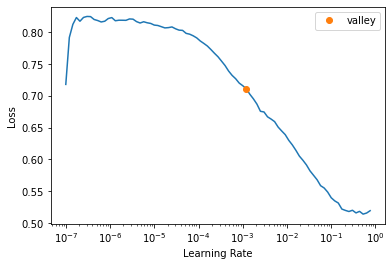

In [14]:
lr_valley = learn.lr_find(suggest_funcs=(valley))

In [15]:
learn.fit_one_cycle(101, lr_valley)

epoch,train_loss,valid_loss,accuracy,time
0,0.798672,0.697158,0.450000,00:00
1,0.765854,0.688271,0.483333,00:00
2,0.707753,0.669076,0.683333,00:00
3,0.653691,0.642104,0.700000,00:00
4,0.622479,0.620031,0.716667,00:00
5,0.592416,0.613230,0.716667,00:00
6,0.565981,0.615434,0.700000,00:00
7,0.545878,0.608124,0.700000,00:00
8,0.529910,0.597832,0.716667,00:00
9,0.510922,0.585867,0.750000,00:00


In [16]:
learn.summary()

TabularModel (Input shape: 64 x torch.Size([64, 5]))
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 3              
Embedding                                 9          True      
____________________________________________________________________________
                     64 x 4              
Embedding                                 20         True      
____________________________________________________________________________
                     64 x 3              
Embedding                                 9          True      
Embedding                                 12         True      
Embedding                                 9          True      
Embedding                                 12         True      
____________________________________________________________________________
                     64 x 4              
Embedding                                 20         True      
____________________________________